In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Завантаження даних MNIST
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
# Нормалізація даних
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

# Визначення архітектури згорткового автокодувальника
input_img = Input(shape=(28, 28, 1))

In [ ]:
# Кодувальник
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Декодувальник
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Об'єднання кодувальника та декодувальника в автокодувальник
autoencoder = Model(input_img, decoded)

# Компілювання моделі
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/20
235/235 [==============================] - 88s 350ms/step - loss: 0.2060 - val_loss: 0.1011
Epoch 2/20
235/235 [==============================] - 75s 318ms/step - loss: 0.0946 - val_loss: 0.0889
Epoch 3/20
235/235 [==============================] - 74s 314ms/step - loss: 0.0874 - val_loss: 0.0842
Epoch 4/20
235/235 [==============================] - 73s 311ms/step - loss: 0.0839 - val_loss: 0.0815
Epoch 5/20
235/235 [==============================] - 83s 352ms/step - loss: 0.0816 - val_loss: 0.0798
Epoch 6/20
235/235 [==============================] - 77s 326ms/step - loss: 0.0799 - val_loss: 0.0783
Epoch 7/20
235/235 [==============================] - 75s 321ms/step - loss: 0.0787 - val_loss: 0.0773
Epoch 8/20
235/235 [==============================] - 72s 306ms/step - loss: 0.0777 - val_loss: 0.0766
Epoch 9/20
235/235 [==============================] - 73s 312ms/step - loss: 0.0769 - val_loss: 0.0758
Epoch 10

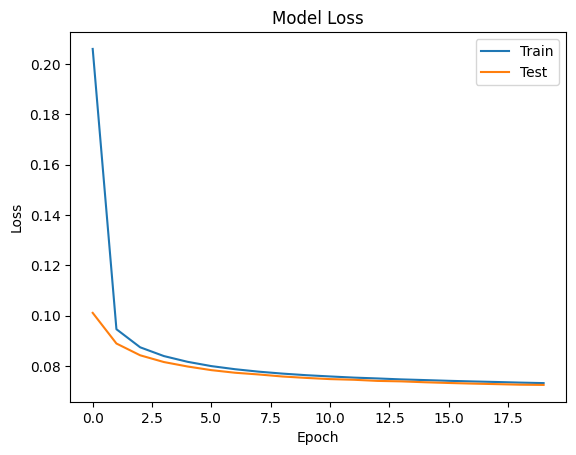

313/313 [==============================] - 5s 15ms/step


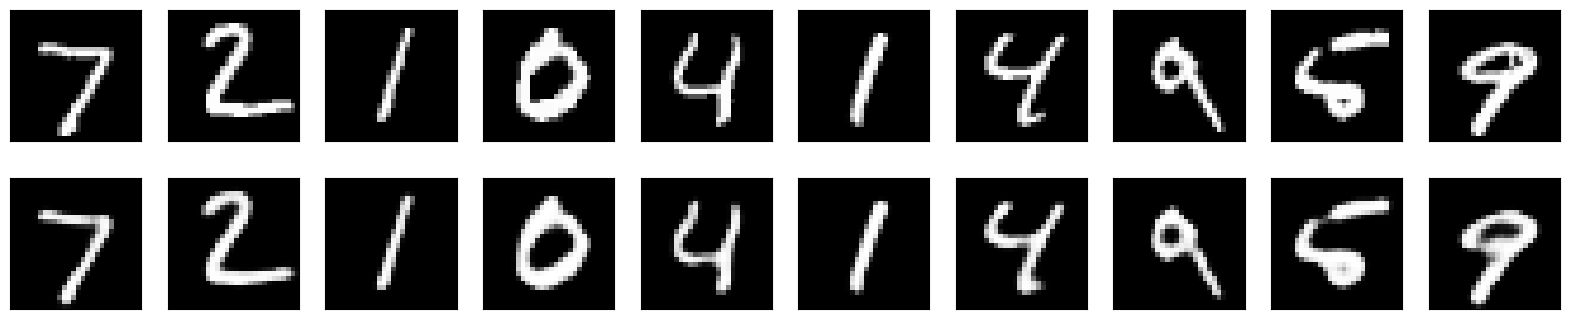

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Завантаження даних MNIST
(x_train, _), (x_test, _) = mnist.load_data()

# Нормалізація даних
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

# Визначення архітектури згорткового автокодувальника
input_img = Input(shape=(28, 28, 1))

# Кодувальник
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Декодувальник
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Об'єднання кодувальника та декодувальника в автокодувальник
autoencoder = Model(input_img, decoded)

# Компілювання моделі
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Навчання моделі
epochs = 20
batch_size = 256
history = autoencoder.fit(x_train, x_train,
                          epochs=epochs,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Візуалізація функції втрат
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Реконструкція тестових зображень
decoded_imgs = autoencoder.predict(x_test)

# Візуалізація реконструйованих зображень
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()